In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from celluloid import Camera
import base64
from IPython.core.display import HTML

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
df = pd.read_csv(
    "data/data.csv",
    usecols=["pickup_datetime", "pickup_latitude", "pickup_longitude"],
)
# df = df.sample(frac=0.2, random_state=1)

df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["pickup_dayofweek"] = df["pickup_datetime"].dt.dayofweek
df["pickup_hourofday"] = df["pickup_datetime"].dt.hour

print("The dataset has", df.shape[0], "rows.")

The dataset has 625134 rows.


In [3]:
def label_day_type(row):
    if (row["pickup_dayofweek"] == 5) or (row["pickup_dayofweek"] == 6):
        return "Weekend"
    else:
        return "Weekday"


df["day_type"] = df.apply(label_day_type, axis=1)

In [4]:
street_map = gpd.read_file(
    "./borough_boundaries/geo_export_3b353314-619e-425d-aea8-83e36f341881.shp"
)

# designate coordinate system
crs = {"init": "EPSG:4326"}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df["pickup_longitude"], df["pickup_latitude"])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
print(geo_df.shape)
geo_df.head()

(625134, 7)


pickup_datetime  pickup_longitude  pickup_latitude  pickup_dayofweek  \
0 2016-06-30 23:59:58           -73.988           40.732                 3   
1 2016-06-30 23:59:53           -73.964           40.680                 3   
2 2016-06-30 23:59:47           -73.997           40.738                 3   
3 2016-06-30 23:59:41           -73.956           40.772                 3   
4 2016-06-30 23:59:33           -73.970           40.761                 3   

   pickup_hourofday day_type                    geometry  
0                23  Weekday  POINT (-73.98813 40.73203)  
1                23  Weekday  POINT (-73.96420 40.67999)  
2                23  Weekday  POINT (-73.99744 40.73758)  
3                23  Weekday  POINT (-73.95607 40.77190)  
4                23  Weekday  POINT (-73.97021 40.76147)

In [6]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(10, 10))

camera = Camera(fig)

for i in range(0, 24):

    # add .shp mapfile to axes
    street_map.plot(ax=ax, alpha=0.4, color="grey")

    # add geodataframe to axes
    geo_df.query(f"day_type == 'Weekday' and pickup_hourofday == {i}").plot(
        color="goldenrod", ax=ax, alpha=0.7, legend=True, markersize=10
    )

    ax.text(
        0.5,
        1.02,
        horizontalalignment="center",
        s=f"Taxi Cab Pickup in NYC on Weekdays (Hour: {i})",
        fontsize=15,
        fontweight="bold",
        transform=ax.transAxes,
    )

    # set latitude and longitude boundaries for map display
    plt.xlim(-74.02, -73.925)
    plt.ylim(40.7, 40.8)

    camera.snap()

plt.close()

animation = camera.animate(interval=800)
animation.save("./gifs/animate_weekday.gif", writer="imagemagick")

In [7]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(10,10))

camera = Camera(fig)
    
for i in range(0,24):

    # add .shp mapfile to axes
    street_map.plot(ax=ax, 
                    alpha=0.4,
                    color='grey')

    # add geodataframe to axes
    geo_df.query(f"day_type == 'Weekend' and pickup_hourofday == {i}").plot(color='goldenrod',
                                                                            ax=ax,alpha=0.7, 
                                                                            legend=True,
                                                                            markersize=10)

    ax.text(0.5, 1.02, 
            horizontalalignment='center', 
            s=f'Taxi Cab Pickup in NYC on Weekends (Hour: {i})',
            fontsize=15,
            fontweight='bold',
            transform=ax.transAxes)
    
    # set latitude and longitude boundaries for map display
    plt.xlim(-74.02,-73.925)
    plt.ylim(40.7,40.8)

    camera.snap()
    
plt.close() 

animation = camera.animate(interval=800)
animation.save('./gifs/animate_weekend.gif', writer = 'imagemagick')

The animation below depicts the pickup activities of Taxis in New York City. 

We understand that trip duration is affected by traffic conditions and hence, a higher density of vehicles on the road mean a longer time spent and vice versa. With that said, we want to examine how traffic density varies with time.

We will observe the pickup density by hours of the day. We will also perform a side-by-side comparison of such activity during the weekdays versus the weekend:


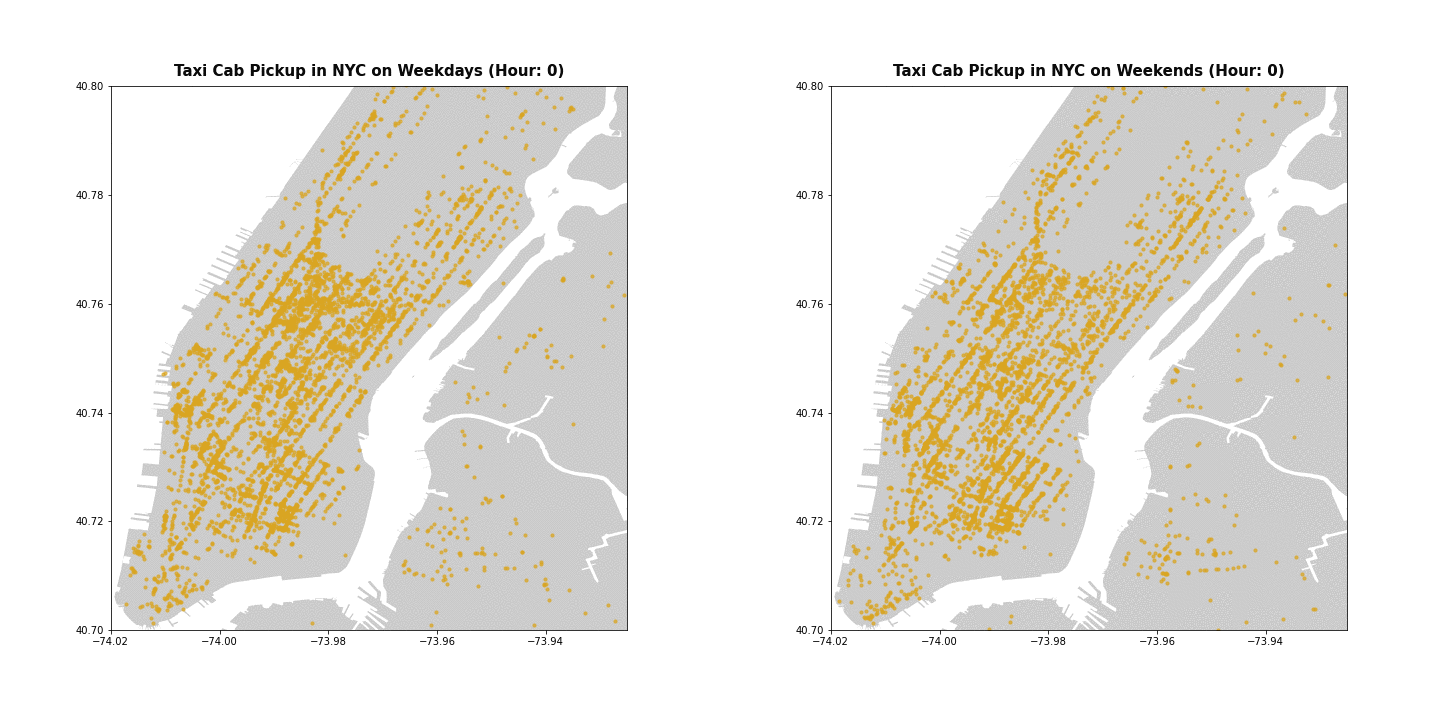

In [8]:
filename = "./gifs/animate_combined.gif"
video = open(filename, "r+b").read()
encoded = base64.b64encode(video)
HTML(
    data="""<img src="data:image/gif;base64,{0}" type="gif" />""".format(
        encoded.decode("ascii")
    )
)

Summary:

* Traffic starts to climb during the morning, peaks on the rush hours, and clears up during midnight.
* In general, a higher density is observed during weekdays compared to weekends. 

---